# 04. Self Oil Station Price Analysis

## 1. 셀레니움 설치
- 윈도우, mac(intel) 
    - conda install selenium 
- mac(m1) 
    - pip install selenium 
    
- chromedriver
    - 크롬 버전 확인 => 크롬 창 우측상단의 더보기 버튼 - 도움말 - Chrome 정보
    - https://chromedriver.chromium.org/downloads => 해당되는 버전 클릭 - 해당 운영체제 파일 클릭

In [1]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get("https://naver.com")

In [3]:
driver.quit()  # quit()으로 꼭 열린 창을 닫아줄 것!

## 2. 셀프 주유소가 정말 저렴하나요? - 데이터 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인 
- 목표 데이터 
    - 브랜드 
    - 가격 
    - 셀프 주유 여부 
    - 위치 

## 3. 셀레니움으로 접근

In [4]:
from selenium import webdriver

In [8]:
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)

In [6]:
driver.get(url)

- 문제 
    - 1. 해당 URL로 한 번에 접근이 안됩니다. 
    - 2. 메인페이지로 접속이 되고, 팝업창이 하나 나옵니다.

In [22]:
# 팝업창으로 화면 전환 후 해당 팝업창 닫아주기 
driver.switch_to_window(driver.window_handles[-1])

C:\Users\HJ\AppData\Local\Temp/ipykernel_29960/806591360.py:2: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])


In [ ]:
# 현재의 화면(팝업창) 닫기
driver.close()

In [30]:
driver.switch_to_window(driver.window_handles[-1])  # 다시 한번 실행하면 메인창으로 화면 전환됨

C:\Users\HJ\AppData\Local\Temp/ipykernel_29960/3747751272.py:1: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])  # 다시 한번 실행하면 메인창으로 화면 전환됨


In [31]:
driver.get(url)  # 해당 url 다시 한번 요청 => 해당 페이지 정상적으로 뜨는 것은 확인함

In [48]:
# 위 코드들은 한 번에 실행해주기 => 중간에 기다리는 시간 설정(time.sleep())

import time

# def main_get():  # 함수 정의한 부분 적용 보류
# 페이지 접근 
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)

time.sleep(3)

# 팝업창으로 전환 
driver.switch_to_window(driver.window_handles[-1])
# 팝업창 닫아주기
driver.close()

time.sleep(3)

# 메인화면 창으로 전환 
driver.switch_to_window(driver.window_handles[-1])
# 접근 URL 다시 요청 
driver.get(url)

C:\Users\HJ\AppData\Local\Temp/ipykernel_29960/882599870.py:14: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])
C:\Users\HJ\AppData\Local\Temp/ipykernel_29960/882599870.py:21: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])


In [34]:
# driver.close()

In [46]:
# 함수로 정의 후 실행하니 아래 find_element_by_id부분에서 어떤 이유에서인지 에러가 발생함. 코드 자체 실행시는 에러 미발생
# main_get()

C:\Users\HJ\AppData\Local\Temp/ipykernel_29960/1670736058.py:14: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])
C:\Users\HJ\AppData\Local\Temp/ipykernel_29960/1670736058.py:21: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[0])


In [51]:
# 지역: 시/도 

sido_list_raw = driver.find_element_by_id("SIDO_NM0")
sido_list_raw.text  # 원하는 data 정보를 가져온 것을 확인함

'            시/도\n            \n             \n              서울\n             \n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n             \n              경기\n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [55]:
sido_list = sido_list_raw.find_elements_by_tag_name("option")  # 여러개일 경우 elements(s 포함)로 가져올 것!
len(sido_list), sido_list[0].text, sido_list[1].text, sido_list[17].text

(18, '시/도', '서울', '제주')

In [56]:
sido_list[1].get_attribute("value")

'서울특별시'

In [57]:
# 1. 
sido_names = [] 

for option in sido_list:
    sido_names.append(option.get_attribute("value"))
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [61]:
test = [option.get_attribute("value") for option in sido_list]
test[:5]

['', '서울특별시', '부산광역시', '대구광역시', '인천광역시']

In [67]:
# 2. 
sido_names = [option.get_attribute("value") for option in sido_list]
sido_names[:5]

['', '서울특별시', '부산광역시', '대구광역시', '인천광역시']

In [68]:
sido_names = sido_names[1:]
sido_names[:5]

['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시']

In [116]:
sido_list_raw.send_keys(sido_names[0])  # 해당 value를 보내서 지역 선택 가능

In [117]:
# 구 

gu_list_raw = driver.find_element_by_id("SIGUNGU_NM0") # 부모 태그 
gu_list = gu_list_raw.find_elements_by_tag_name("option") # 자식 태그 

gu_names = [option.get_attribute("value") for option in gu_list]
gu_names = gu_names[1:]
gu_names[:5], len(gu_names)

(['강남구', '강동구', '강북구', '강서구', '관악구'], 25)

In [118]:
gu_list_raw.send_keys(gu_names[15])

In [119]:
# 엑셀 저장 

driver.find_element_by_css_selector("#glopopd_excel").click()  # css_selector

In [120]:
driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()  # xpath

In [121]:
element_get_excel = driver.find_element_by_id("glopopd_excel")  # id
element_get_excel.click()

In [122]:
# for문으로 한꺼번에 적용하기(시군구별 data 엑셀 파일로 저장)

import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    time.sleep(3)
    
    element_get_excel = driver.find_element_by_id("glopopd_excel")
    element_get_excel.click()
    time.sleep(3)

C:\Users\HJ\AppData\Local\Temp/ipykernel_29960/3035254930.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [123]:
driver.close()

## 4. 데이터 정리하기

In [181]:
import pandas as pd
from glob import glob

In [128]:
# 파일 목록 한 번에 가져오기 test
glob("../data/지역_*.xls")

['../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (25).xls',
 '../data\\지역_위치별(주유소) (26).xls',
 '../data\\지역_위치별(주유소) (27).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls']

In [129]:
# 파일 목록 저장
stations_files = glob("../data/지역_*.xls")
stations_files[:5]

['../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls']

In [131]:
# 하나만 읽어보기
tmp = pd.read_excel(stations_files[0])
tmp.head()  # 첫번째, 두번째 행의 정보는 굳이 필요하지 않음 확인함. 세번째 열부터 표 시작함.

,지역_위치별(주유소),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위 : 원/리터)
1,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
2,서울특별시,구광주유소,서울특별시 금천구 서부샛길 674 (가산동),S-OIL,02-868-6889,N,-,1635,1435,950
3,서울특별시,(주)진우에너지 백운주유소,서울 금천구 시흥대로 282 (독산동),알뜰주유소,02-894-8521,Y,-,1655,1439,1100
4,서울특별시,지에스칼텍스(주)일신주유소,서울 금천구 시흥대로 118,GS칼텍스,02-896-5145,Y,1840,1674,1464,1000


In [132]:
# 하나만 읽어보기
tmp = pd.read_excel(stations_files[0], header=2)  # header옵션 적용
tmp.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구광주유소,서울특별시 금천구 서부샛길 674 (가산동),S-OIL,02-868-6889,N,-,1635,1435,950
1,서울특별시,(주)진우에너지 백운주유소,서울 금천구 시흥대로 282 (독산동),알뜰주유소,02-894-8521,Y,-,1655,1439,1100
2,서울특별시,지에스칼텍스(주)일신주유소,서울 금천구 시흥대로 118,GS칼텍스,02-896-5145,Y,1840,1674,1464,1000
3,서울특별시,백산주유소,서울특별시 금천구 시흥대로 174 (시흥동),S-OIL,02-807-3161,Y,-,1675,1465,-
4,서울특별시,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),GS칼텍스,02-805-7888,Y,1845,1675,1465,-


In [139]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

- 형식이 동일하고 연달아 붙이기만 하면 될 때는 concat

In [140]:
# 리스트 안에 있는 DataFrame들을 concat()으로 합쳐주기
stations_raw = pd.concat(tmp_raw)
stations_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구광주유소,서울특별시 금천구 서부샛길 674 (가산동),S-OIL,02-868-6889,N,-,1635,1435,950
1,서울특별시,(주)진우에너지 백운주유소,서울 금천구 시흥대로 282 (독산동),알뜰주유소,02-894-8521,Y,-,1655,1439,1100
2,서울특별시,지에스칼텍스(주)일신주유소,서울 금천구 시흥대로 118,GS칼텍스,02-896-5145,Y,1840,1674,1464,1000
3,서울특별시,백산주유소,서울특별시 금천구 시흥대로 174 (시흥동),S-OIL,02-807-3161,Y,-,1675,1465,-
4,서울특별시,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),GS칼텍스,02-805-7888,Y,1845,1675,1465,-
...,...,...,...,...,...,...,...,...,...,...
17,서울특별시,SK에너지(주)직영 개봉동주유소,서울 구로구 경인로 290 (개봉동),SK에너지,02-2616-5189,N,-,1719,1499,-
18,서울특별시,영진주유소,서울 구로구 구로동로 20 (가리봉동),S-OIL,02-861-6625,N,-,1726,1486,-
19,서울특별시,현대오일뱅크(주)직영 신구로주유소,서울 구로구 가마산로 293 (구로동),현대오일뱅크,02-859-0051,N,1888,1748,1539,-
20,서울특별시,동아주유소,서울 구로구 도림로 91 (구로동),S-OIL,02-855-1282,N,-,1898,1598,1200


In [141]:
stations_raw.info()  # index 숫자 체크 => 추후 셋팅 필요

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 21
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      478 non-null    object
 1   상호      478 non-null    object
 2   주소      478 non-null    object
 3   상표      478 non-null    object
 4   전화번호    478 non-null    object
 5   셀프여부    478 non-null    object
 6   고급휘발유   478 non-null    object
 7   휘발유     478 non-null    object
 8   경유      478 non-null    object
 9   실내등유    478 non-null    object
dtypes: object(10)
memory usage: 41.1+ KB


In [142]:
stations_raw.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [144]:
stations = pd.DataFrame({
    "상호": stations_raw["상호"],
    "주소": stations_raw["주소"], 
    "가격": stations_raw["휘발유"],
    "셀프": stations_raw["셀프여부"],
    "상표": stations_raw["상표"]
})
stations

,상호,주소,가격,셀프,상표
0,구광주유소,서울특별시 금천구 서부샛길 674 (가산동),1635,N,S-OIL
1,(주)진우에너지 백운주유소,서울 금천구 시흥대로 282 (독산동),1655,Y,알뜰주유소
2,지에스칼텍스(주)일신주유소,서울 금천구 시흥대로 118,1674,Y,GS칼텍스
3,백산주유소,서울특별시 금천구 시흥대로 174 (시흥동),1675,Y,S-OIL
4,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),1675,Y,GS칼텍스
...,...,...,...,...,...
17,SK에너지(주)직영 개봉동주유소,서울 구로구 경인로 290 (개봉동),1719,N,SK에너지
18,영진주유소,서울 구로구 구로동로 20 (가리봉동),1726,N,S-OIL
19,현대오일뱅크(주)직영 신구로주유소,서울 구로구 가마산로 293 (구로동),1748,N,현대오일뱅크
20,동아주유소,서울 구로구 도림로 91 (구로동),1898,N,S-OIL


In [145]:
# 주소 정보에서 구 정보만 추출해서 새로운 컬럼 생성하기
stations["구"] = [eachAddress.split()[1] for eachAddress in stations["주소"]]
stations.head()

,상호,주소,가격,셀프,상표,구
0,구광주유소,서울특별시 금천구 서부샛길 674 (가산동),1635,N,S-OIL,금천구
1,(주)진우에너지 백운주유소,서울 금천구 시흥대로 282 (독산동),1655,Y,알뜰주유소,금천구
2,지에스칼텍스(주)일신주유소,서울 금천구 시흥대로 118,1674,Y,GS칼텍스,금천구
3,백산주유소,서울특별시 금천구 시흥대로 174 (시흥동),1675,Y,S-OIL,금천구
4,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),1675,Y,GS칼텍스,금천구


In [147]:
stations["구"].unique(), len(stations["구"].unique())  # 25개 구 정보 확인함 => 이상없음

(array(['금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구',
        '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
        '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구'], dtype=object),
 25)

In [ ]:
# 만약 구 정보에 포함되지 않아야 할 정보가 포함된 경우, 아래와 같이 제외시키는 것 가능 => loc[] 활용
# stations[stations["구"] == "특별시"]  # 포함되지 않아야 할 정보 내역 확인
# stations.loc[stations["구"] == "특별시", "구"] = "OO구"  # 잘못된 구 정보를 의도한대로 표기하기 위해 수정해줌

In [148]:
# "가격" 컬럼의 숫자를 float로 형변환 진행 => "-"값 존재에 따른 오류 발생
stations["가격"] = stations["가격"].astype("float")

ValueError: could not convert string to float: '-'

In [151]:
# "-"값 내역 확인
stations[stations["가격"] == "-"]

,상호,주소,가격,셀프,상표,구
14,양지진흥개발(주)상계주유소,서울 노원구 노해로 527 (상계동),-,N,SK에너지,노원구
17,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),-,Y,현대오일뱅크,도봉구
31,현대오일뱅크㈜직영 올림픽셀프주유소,서울 송파구 위례성대로 188 (오금동),-,Y,현대오일뱅크,송파구
27,지에스칼텍스㈜ 화일주유소,서울 영등포구 도림로 415,-,Y,GS칼텍스,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
14,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,-,Y,GS칼텍스,중랑구
35,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
36,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),-,N,GS칼텍스,강남구
37,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


In [152]:
# 가격 정보가 있는 주유소 data만 사용하기 위한 추출 작업
stations = stations[stations["가격"] != "-"]
stations.head()

,상호,주소,가격,셀프,상표,구
0,구광주유소,서울특별시 금천구 서부샛길 674 (가산동),1635,N,S-OIL,금천구
1,(주)진우에너지 백운주유소,서울 금천구 시흥대로 282 (독산동),1655,Y,알뜰주유소,금천구
2,지에스칼텍스(주)일신주유소,서울 금천구 시흥대로 118,1674,Y,GS칼텍스,금천구
3,백산주유소,서울특별시 금천구 시흥대로 174 (시흥동),1675,Y,S-OIL,금천구
4,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),1675,Y,GS칼텍스,금천구


In [153]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 21
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      467 non-null    object
 1   주소      467 non-null    object
 2   가격      467 non-null    object
 3   셀프      467 non-null    object
 4   상표      467 non-null    object
 5   구       467 non-null    object
dtypes: object(6)
memory usage: 25.5+ KB


In [154]:
stations["가격"] = stations["가격"].astype("float")
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 21
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      467 non-null    object 
 1   주소      467 non-null    object 
 2   가격      467 non-null    float64
 3   셀프      467 non-null    object 
 4   상표      467 non-null    object 
 5   구       467 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.5+ KB


C:\Users\HJ\AppData\Local\Temp/ipykernel_29960/3717426255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations["가격"] = stations["가격"].astype("float")


In [155]:
stations

,상호,주소,가격,셀프,상표,구
0,구광주유소,서울특별시 금천구 서부샛길 674 (가산동),1635.0,N,S-OIL,금천구
1,(주)진우에너지 백운주유소,서울 금천구 시흥대로 282 (독산동),1655.0,Y,알뜰주유소,금천구
2,지에스칼텍스(주)일신주유소,서울 금천구 시흥대로 118,1674.0,Y,GS칼텍스,금천구
3,백산주유소,서울특별시 금천구 시흥대로 174 (시흥동),1675.0,Y,S-OIL,금천구
4,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),1675.0,Y,GS칼텍스,금천구
...,...,...,...,...,...,...
17,SK에너지(주)직영 개봉동주유소,서울 구로구 경인로 290 (개봉동),1719.0,N,SK에너지,구로구
18,영진주유소,서울 구로구 구로동로 20 (가리봉동),1726.0,N,S-OIL,구로구
19,현대오일뱅크(주)직영 신구로주유소,서울 구로구 가마산로 293 (구로동),1748.0,N,현대오일뱅크,구로구
20,동아주유소,서울 구로구 도림로 91 (구로동),1898.0,N,S-OIL,구로구


In [156]:
# 인덱스 재정렬
stations.reset_index(inplace=True)

In [160]:
stations.tail()

,index,상호,주소,가격,셀프,상표,구
462,17,SK에너지(주)직영 개봉동주유소,서울 구로구 경인로 290 (개봉동),1719.0,N,SK에너지,구로구
463,18,영진주유소,서울 구로구 구로동로 20 (가리봉동),1726.0,N,S-OIL,구로구
464,19,현대오일뱅크(주)직영 신구로주유소,서울 구로구 가마산로 293 (구로동),1748.0,N,현대오일뱅크,구로구
465,20,동아주유소,서울 구로구 도림로 91 (구로동),1898.0,N,S-OIL,구로구
466,21,구로주유소,서울 구로구 구로동로 137 (구로동),2198.0,N,GS칼텍스,구로구


In [161]:
del stations["index"]
stations.tail()

,상호,주소,가격,셀프,상표,구
462,SK에너지(주)직영 개봉동주유소,서울 구로구 경인로 290 (개봉동),1719.0,N,SK에너지,구로구
463,영진주유소,서울 구로구 구로동로 20 (가리봉동),1726.0,N,S-OIL,구로구
464,현대오일뱅크(주)직영 신구로주유소,서울 구로구 가마산로 293 (구로동),1748.0,N,현대오일뱅크,구로구
465,동아주유소,서울 구로구 도림로 91 (구로동),1898.0,N,S-OIL,구로구
466,구로주유소,서울 구로구 구로동로 137 (구로동),2198.0,N,GS칼텍스,구로구


## 5. 주유 가격 정보 시각화

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")
# %matplotlib inline

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system")

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

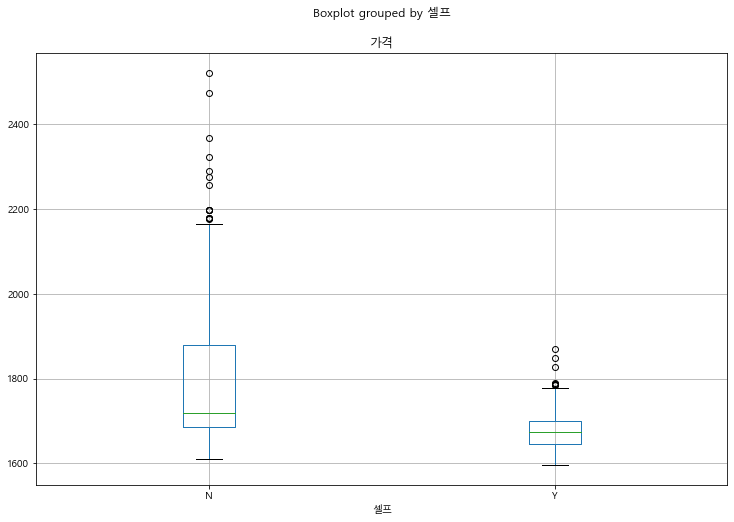

In [166]:
# boxplot(feat. pandas)

stations.boxplot(column="가격", by="셀프", figsize=(12, 8))

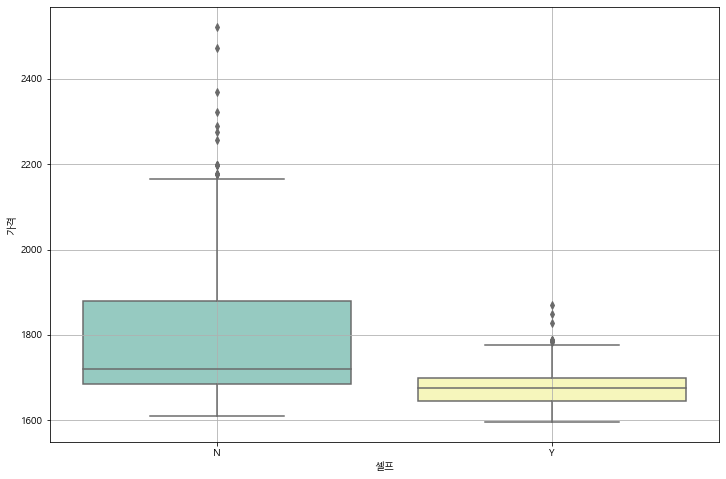

In [169]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12, 8))
sns.boxplot(x="셀프", y="가격", data=stations, palette="Set3")
plt.grid()
plt.show()

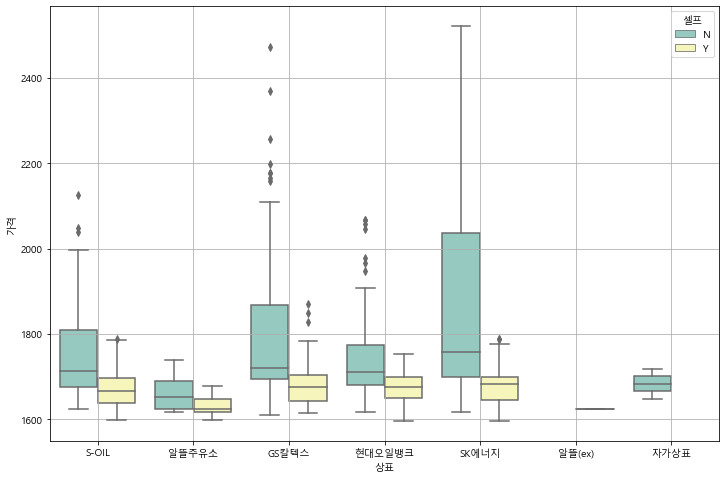

In [173]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12, 8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.grid(True)
plt.show()

In [174]:
# 지도 시각화

In [175]:
import json
import folium
import warnings

In [176]:
warnings.simplefilter(action="ignore", category=FutureWarning)  # 경고 문구 안보이도록 설정

In [177]:
# 가장 비싼 주유소 10개 
stations.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
304,서남주유소,서울 중구 통일로 30,2522.0,N,SK에너지,중구
269,서계주유소,서울 용산구 청파로 367 (서계동),2473.0,N,GS칼텍스,용산구
303,필동주유소,서울 중구 퇴계로 196 (필동2가),2369.0,N,GS칼텍스,중구
302,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2322.0,N,SK에너지,중구
268,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구
353,뉴서울(강남),서울 강남구 언주로 716,2275.0,N,SK에너지,강남구
301,약수주유소,서울 중구 다산로 173,2258.0,N,GS칼텍스,중구
466,구로주유소,서울 구로구 구로동로 137 (구로동),2198.0,N,GS칼텍스,구로구
294,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2198.0,N,SK에너지,종로구
267,에너비스,서울 용산구 한남대로 82 (한남동),2198.0,N,SK에너지,용산구


In [178]:
# 가장 저렴한 주유소 10개 
stations.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
42,동서울고속주유소,서울 동대문구 한천로 414,1595.0,Y,SK에너지,동대문구
11,화랑대주유소,서울 노원구 화랑로 483,1595.0,Y,현대오일뱅크,노원구
233,성락주유소,서울 영등포구 가마산로 414 (신길동),1598.0,Y,S-OIL,영등포구
232,도림주유소,서울 영등포구 도림로 343 (도림동),1598.0,Y,알뜰주유소,영등포구
231,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1598.0,Y,SK에너지,영등포구
230,영등포제일셀프주유소,서울 영등포구 가마산로 379,1598.0,Y,현대오일뱅크,영등포구
205,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1609.0,Y,SK에너지,양천구
234,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1609.0,N,GS칼텍스,영등포구
174,송파알찬주유소,서울 송파구 백제고분로 229 (삼전동),1610.0,Y,S-OIL,송파구
175,삼전셀프주유소,서울 송파구 백제고분로 199,1610.0,Y,SK에너지,송파구


In [184]:
import numpy as np

gu_data = stations.pivot_table(index="구", values="가격", aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1876.971429
강동구,1770.625000
강북구,1638.846154
강서구,1690.281250
관악구,1721.466667


In [189]:
geo_path="../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="Stamen Toner")
my_map.choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, "가격"],
    key_on="feature.id",
    fill_color="PuRd"
)
my_map